In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import matplotlib.cm as cm
from scipy.misc import imresize
import cv2

In [53]:
hnd_train = glob('../../Datas/letter/Hnd/Digit/train/*/*')
real_train = glob('../../Datas/letter/EnglishImg/English/Img/GoodImg/English_image/Digit/train/*/*')
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST_datxa/", one_hot=True)

Extracting ../MNIST_datxa/train-images-idx3-ubyte.gz
Extracting ../MNIST_datxa/train-labels-idx1-ubyte.gz
Extracting ../MNIST_datxa/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_datxa/t10k-labels-idx1-ubyte.gz


In [54]:
hnd_image = cv2.imread(hnd_train[0])
real_image = cv2.imread(real_train[0])
mnist_image = mnist.train.images[7]

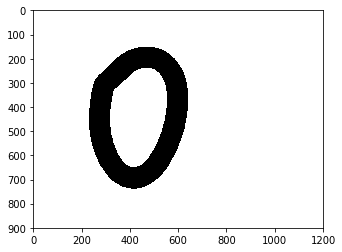

In [24]:
plt.imshow(hnd_image)

In [25]:
hnd_image.shape

(900, 1200, 3)

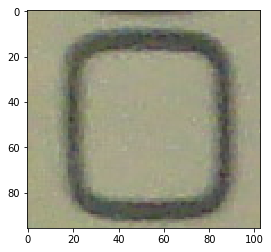

In [26]:
plt.imshow(real_image)

In [27]:
real_image.shape

(96, 103, 3)

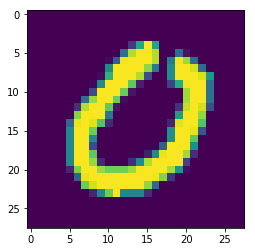

In [28]:
plt.imshow(mnist_image.reshape(28, 28))

In [29]:
mnist_image.shape

(784,)

In [30]:
img= cv2.GaussianBlur(real_image, (5, 5), 0)

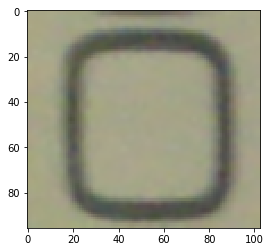

In [31]:
plt.imshow(img)

In [32]:
img_2 = cv2.GaussianBlur(hnd_image, (5, 5), 0)

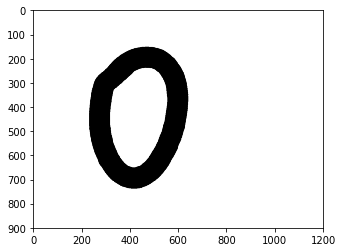

In [33]:
plt.imshow(img_2)

In [39]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # make gray
gray_mean = np.mean(gray)
ret,thresh = cv2.threshold(gray,gray_mean,1,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU )

In [40]:
gray_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY) # make gray
gray_mean_2 = np.mean(gray_2)
ret,thresh_2 = cv2.threshold(gray_2,gray_mean_2,255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU )

In [41]:
kernel = np.ones((1,1), np.uint8)
img_dilation = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #to get more clear image
img_dilation_2 = cv2.morphologyEx(thresh_2, cv2.MORPH_CLOSE, kernel) #to get more clear image

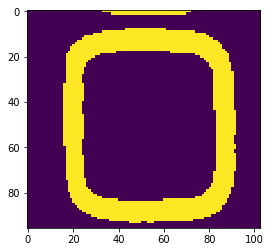

In [42]:
plt.imshow(img_dilation)

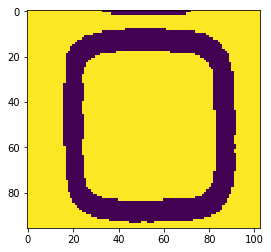

In [48]:
unique, counts = np.unique(img_dilation, return_counts = True)
a = dict(zip(unique, counts))
ret, img_1= cv2.threshold(img_dilation,0,1,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU )
plt.imshow(img_1)

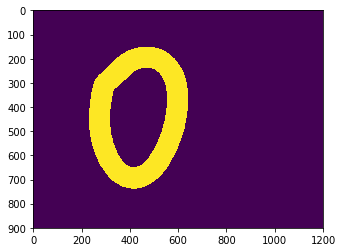

In [26]:
plt.imshow(img_dilation_2)

In [27]:
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
x, y, w, h = cv2.boundingRect(ctrs[0]) # make rectangle following out line
roi = img_dilation[y:y+h, x:x+w] #make region of image

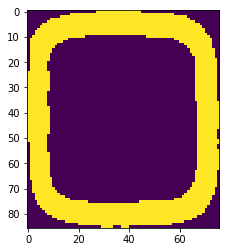

In [106]:
plt.imshow(roi)

In [107]:
if h > w:
    x -= (h - w)//2
    w += (h - w)
elif h < w:
    y -= (w - h)//2
    h += (w - h)
roi = img_dilation[y:y+h, x:x+w] #make region of image

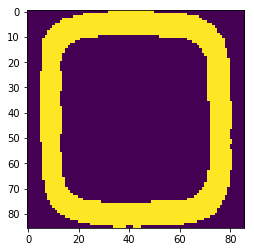

In [108]:
plt.imshow(roi)

In [47]:
im2,ctrs, hier = cv2.findContours(img_dilation_2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
x, y, w, h = cv2.boundingRect(ctrs[0]) # make rectangle following out line
roi_2 = img_dilation_2[y:y+h, x:x+w] #make region of image

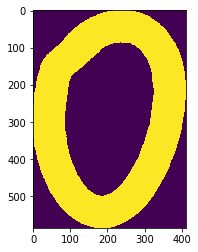

In [48]:
plt.imshow(roi_2)

In [49]:
if h > w:
    x -= (h - w)//2
    w += (h - w)
elif h < w:
    y -= (w - h)//2
    h += (w - h)
roi_2 = img_dilation_2[y:y+h, x:x+w] #make region of image

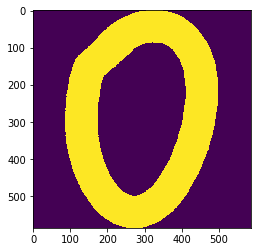

In [50]:
plt.imshow(roi_2)

In [28]:
roi_resized = imresize(img_dilation, (28, 28)).reshape(784)
roi_resized = np.array(roi_resized, dtype= np.float32)
for i in range(len(roi_resized)):
    roi_resized[i] /= 255

C:\Anaconda-python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


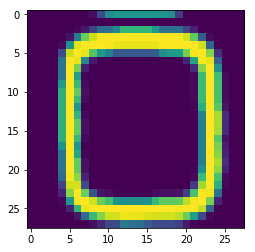

In [29]:
plt.imshow(roi_resized.reshape(28, 28))

In [52]:
roi_resized_2 = imresize(roi_2, (28, 28)).reshape(784)
roi_resized_2 = np.array(roi_resized_2, dtype= np.float32)
for i in range(len(roi_resized_2)):
    roi_resized_2[i] /= 255

C:\Anaconda-python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


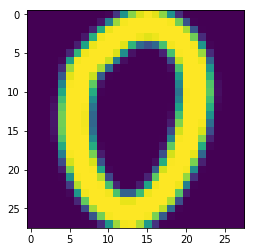

In [53]:
plt.imshow(roi_resized_2.reshape(28, 28))

In [66]:
def read_image_not_roi(path):
    img = cv2.imread(path) # read the image from the path
    img = cv2.GaussianBlur(img, (5, 5), 0)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # make gray
    gray_mean = np.mean(gray)
    ret,thresh = cv2.threshold(gray,gray_mean,255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU )  #make binary
    kernel = np.ones((1,1), np.uint8) 
    img_dilation = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #to get more clear image
    unique, counts = np.unique(img_dilation, return_counts = True)
    num_dict = dict(zip(unique, counts))
    if(num_dict[255] >= num_dict[0]):
        ret,img_dilation = cv2.threshold(img_dilation,gray_mean,255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU )
    image = imresize(img_dilation, (28, 28)).reshape(784)
    image = np.array(image, dtype= np.float32)
    for i in range(len(image)):
        image[i] /= 255
    return image


In [95]:
a = read_image_not_roi(real_train[0])

C:\Anaconda-python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]


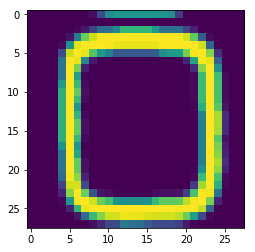

In [96]:
plt.imshow(a.reshape(28, 28))

In [97]:
a

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03137255, 0.21960784,
       0.47843137, 0.5254902 , 0.5254902 , 0.5254902 , 0.5254902 ,
       0.5254902 , 0.5254902 , 0.5254902 , 0.49019608, 0.16862746,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.0627451 , 0.1882353 ,
       0.3529412 , 0.3764706 , 0.47058824, 0.654902  , 0.65882355,
       0.65882355, 0.65882355, 0.5411765 , 0.3764706 , 0.37647